In [1]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
from scipy import *
from scipy import optimize

In [3]:
h = 1
h_ = h/(2*pi)
e = 1.602e-19
cf = 1          # if cf = h_, use units where h_ = 1

mm = 1          # oscillator mass
omega = 2 * pi  # oscillator frequency in GHz
x0 = 0          # shift in oscillator potiential minimum

args = {'w': omega, 'm': mm, 'x0': x0}

k = -h_ ** 2 / (2 * mm)

x_min = -pi
x_max =  pi
N = 750 

NameError: name 'depth' is not defined

In [17]:

def U_ho(x, args):
    """
    Harmonic oscillator potential
    """
    
    omega = args['w']
    m     = args['m']
    x0    = args['x0']
    
    u = 1/2.0 * m * (omega ** 2) * ((x - x0) ** 2)

    return u

In [18]:
x = linspace(x_min, x_max, N)

In [19]:
U = U_ho(x, args);

x_opt_min = optimize.fmin(U_ho, [0.0], (args,))

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 3
         Function evaluations: 6


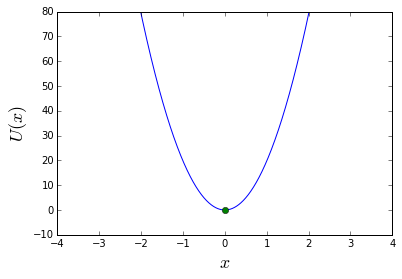

In [20]:
fig, ax = subplots()

ax.plot(x, U)
ax.plot(x_opt_min, U_ho(x_opt_min, args), 'o')

ax.set_ylim(-10, 80)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$U(x)$', fontsize=18);

In [23]:
u = assemble_u_potential(N, U_ho, x, args)

K = assemble_K(N, k, x_min, x_max)

V = assemble_V(N, u, x_min, x_max)

H = K + V

evals, evecs = solve_eigenproblem(H)

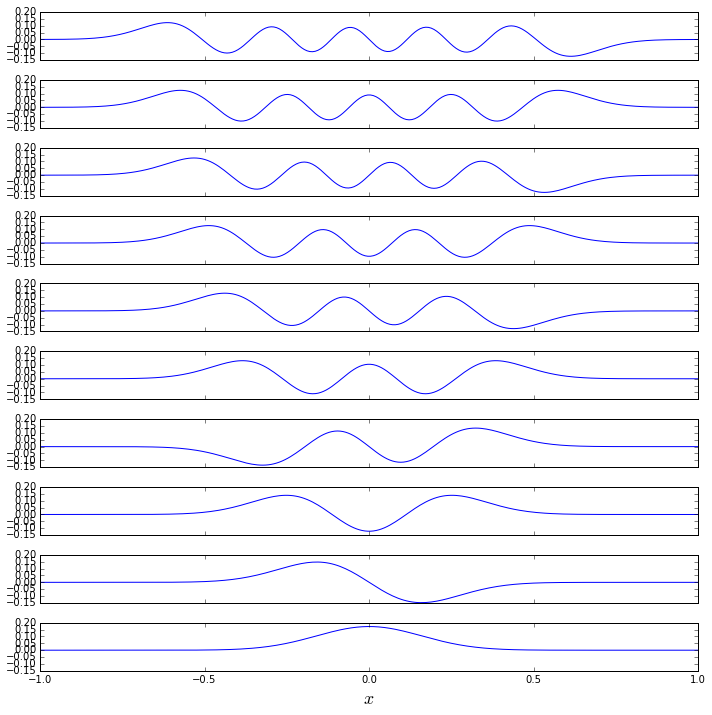

In [22]:
NN = 10

fig, axes = subplots(NN, 1, figsize=(10,NN*1), sharex=True, sharey=True)

for n in range(NN):
    Y = evecs[NN-n-1]
    axes[n].plot(x, Y.real)

axes[n].set_xlim(-1, 1)
axes[n].set_xlabel(r'$x$', fontsize=18)
#axes[n].set_ylabel(r'$\Psi_n(x)$', fontsize=18);
fig.tight_layout();

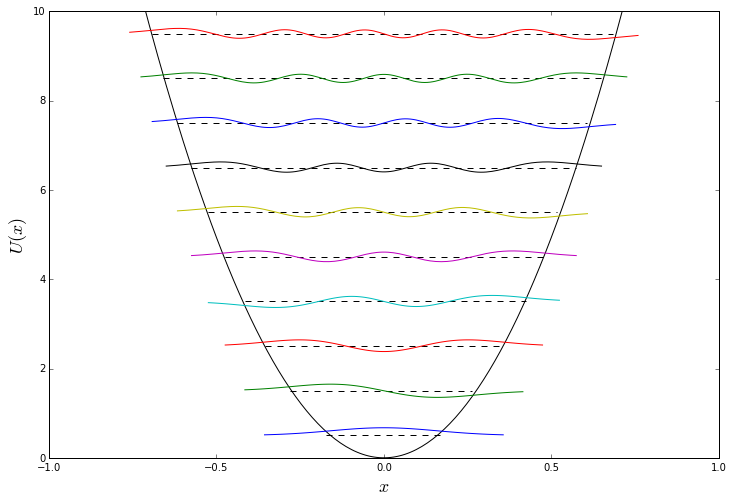

In [24]:
fig, ax = subplots(figsize=(12,8))

ax.plot(x, U, 'k')
for n in range(10):
    Y = evals[n] + evecs[n]

    mask = where(Y > U)    
    ax.plot(x[mask], evals[n].real * ones(shape(x))[mask], 'k--')

    mask = where(Y > U-2.0)
    ax.plot(x[mask], Y[mask].real)
    
ax.set_xlim(-1, 1)
ax.set_ylim(0, 10)
ax.set_xlabel(r'$x$', fontsize=18)
ax.set_ylabel(r'$U(x)$', fontsize=18);

In [14]:
inner_prod = zeros((len(boundidx), len(boundidx))).astype(np.complex)
expect_pos = zeros((len(boundidx), len(boundidx))).astype(np.complex)
expect_kin = zeros((len(boundidx), len(boundidx))).astype(np.complex)

for i, l in enumerate(boundidx):
    for j, k in enumerate(boundidx):
    
        psi_l = wavefunction_normalize(x, evecs[l])
        psi_k = wavefunction_normalize(x, evecs[k])
    
        inner_prod[i,j] = inner_product(x, psi_l, psi_k)                 # <psi_l|psi_k>
        expect_pos[i,j] = inner_product(x, psi_l, x * psi_k)             # <psi_l|x|psi_k>
        expect_kin[i,j] = inner_product(x, psi_l, derivative(x, psi_k))  # <psi_l|p|psi_k>

NameError: name 'boundidx' is not defined

In [15]:
boundidx = arange(10)
nbound = len(boundidx)
            
print "Found bound states: ", boundidx

Found bound states:  [0 1 2 3 4 5 6 7 8 9]


In [16]:
print "eigenenergies = " 

evals[0:nbound].real

eigenenergies = 


array([-579.24177329, -551.74029645, -529.68159054, -510.52645987,
       -493.29425735, -477.47489592, -462.75985171, -448.94431251,
       -435.88338519, -423.46970162])